In [9]:
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from os import walk, path


In [12]:
def download_metrics_from_output(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    # Initialize an empty dictionary to store the results
    metrics = {}

    for domain, values in data.items():
        y_true = values['y']
        y_pred = values['y_hat']

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0, pos_label=0)
        recall = recall_score(y_true, y_pred, zero_division=0, pos_label=0)
        f1 = f1_score(y_true, y_pred, zero_division=0, pos_label=0)

        disp = ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred, values_format='')
        disp.plot()

        metrics[domain] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

    dest_path = f"../../data/fine_tuned/results/vs_m4_from_m4/domain/{file_path.split('/')[-1]}"
    # Output the metrics dictionary
    print(metrics)
    with open(dest_path, 'w', encoding='utf-8') as f:
        json.dump(metrics, f, ensure_ascii=False, indent=4)

{'self': {'accuracy': 0.9897321428571428, 'precision': 0.9920634920634921, 'recall': 0.9573304157549234, 'f1_score': 0.9743875278396437}, 'domain-wikihow': {'accuracy': 0.7473958333333334, 'precision': 0.4165067178502879, 'recall': 0.651, 'f1_score': 0.5079984393289114}, 'domain-wikipedia': {'accuracy': 0.7424964689265536, 'precision': 0.6083333333333333, 'recall': 0.07312186978297162, 'f1_score': 0.13055141579731744}, 'domain-arxiv': {'accuracy': 0.8125, 'precision': 0.7837837837837838, 'recall': 0.07795698924731183, 'f1_score': 0.14180929095354522}}
{'self': {'accuracy': 0.9953125, 'precision': 0.9832214765100671, 'recall': 0.9932203389830508, 'f1_score': 0.9881956155143339}, 'domain-reddit': {'accuracy': 0.8068910256410257, 'precision': 0.9565217391304348, 'recall': 0.02956989247311828, 'f1_score': 0.05736636245110821}, 'domain-wikipedia': {'accuracy': 0.7410840395480226, 'precision': 0.8875, 'recall': 0.02370617696160267, 'f1_score': 0.04617886178861789}, 'domain-arxiv': {'accuracy

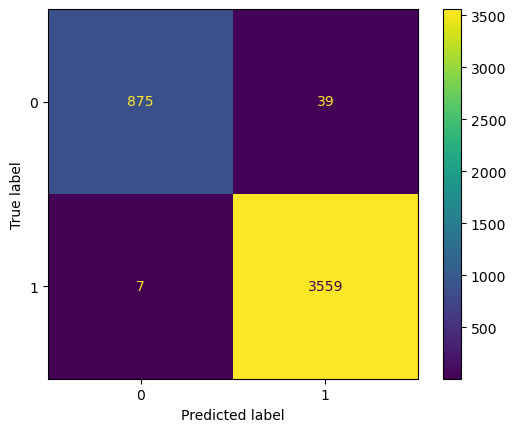

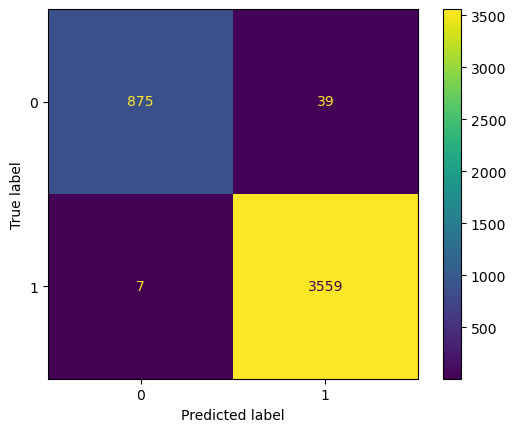

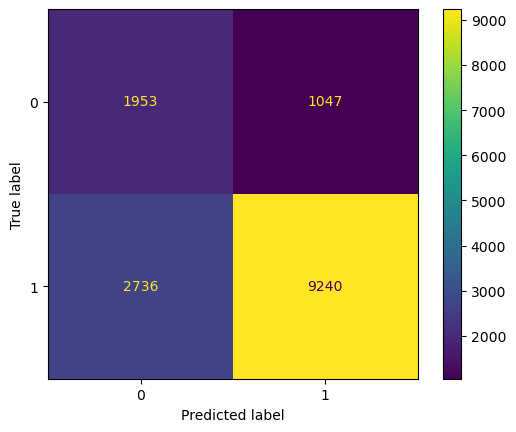

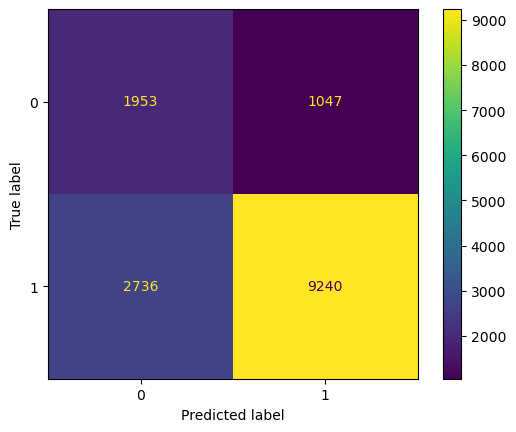

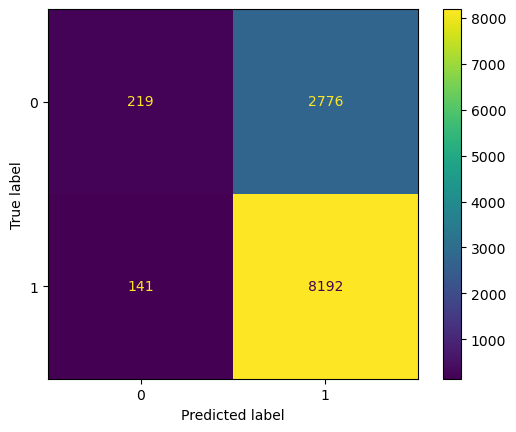

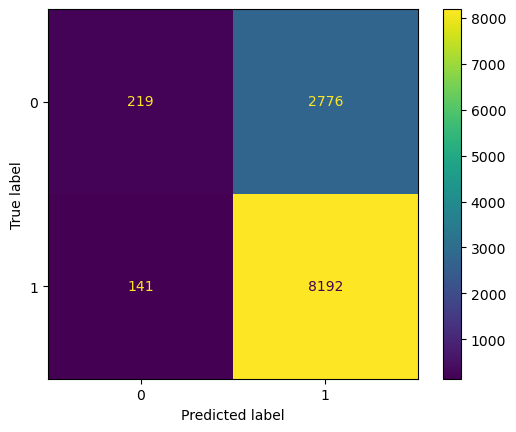

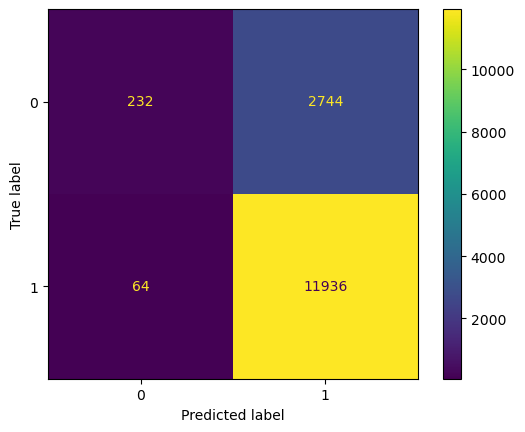

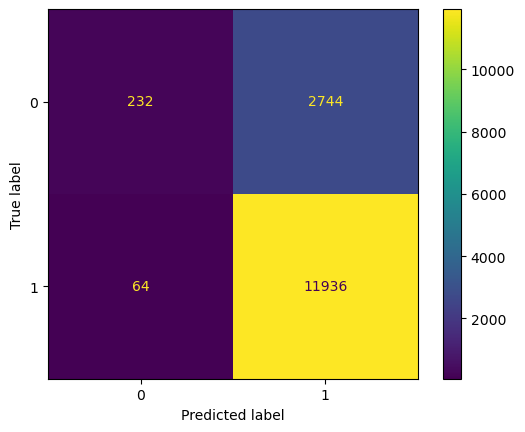

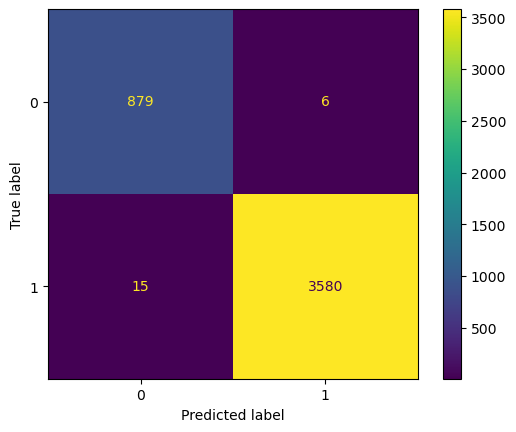

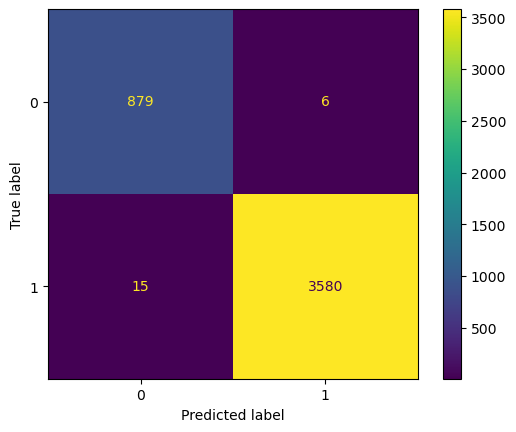

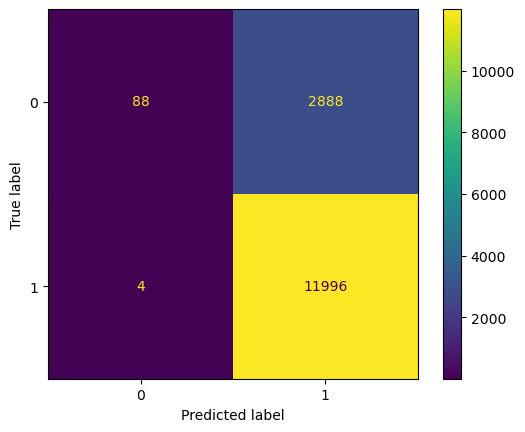

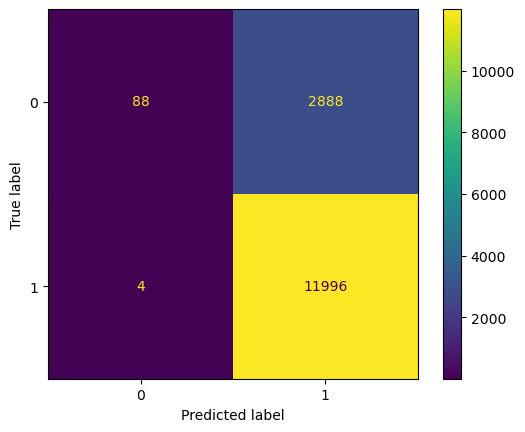

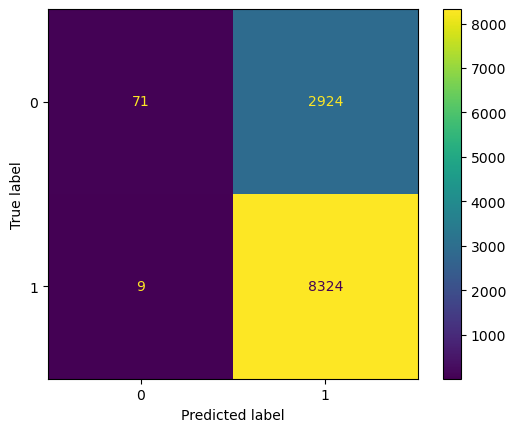

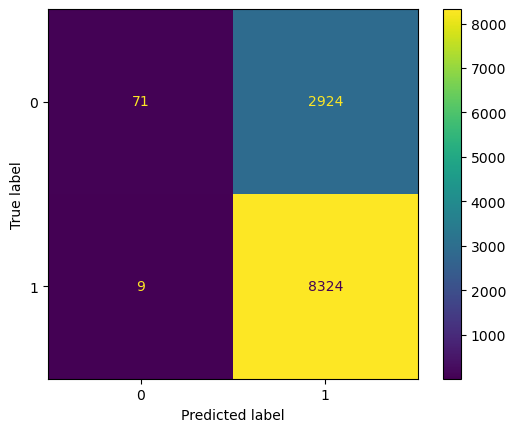

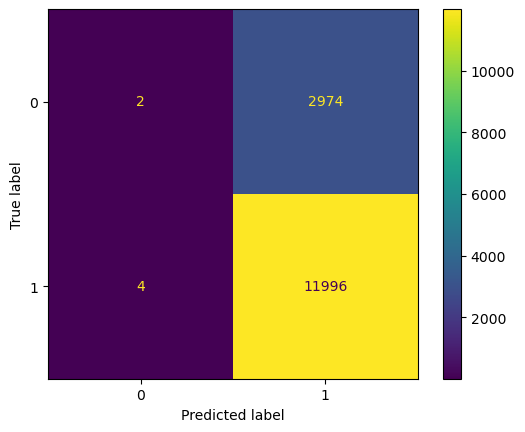

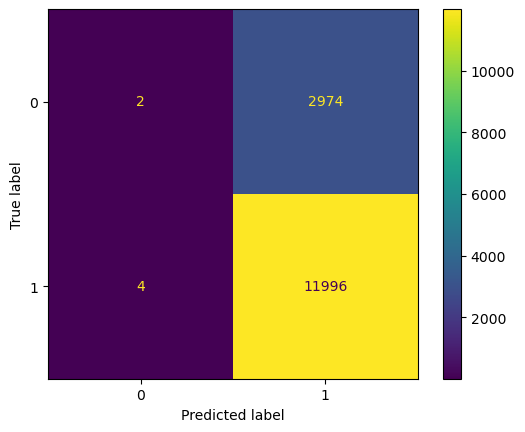

In [13]:
dir_path, _, file_names = next(walk('../../data/fine_tuned/output/m4-domain'))

for file_name in file_names:
    download_metrics_from_output(f"{dir_path}/{file_name}")